In [1]:
################################################
#  Developed by Jonathan Ojeda 1-6-2020 TIA-UTAS
#  Functionalities:
#  - Plot global map from shp file
#  - Edit legend in the map
#  - Add pie plots in the map
#  - Fashion legends and colours
################################################

In [2]:
#Import required packages
import os
os.environ["PROJ_LIB"] = r'C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\Library\share'; #fixr
from mpl_toolkits.basemap import Basemap

import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import dateutil
import pylab as py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans
import shapefile
import pandas as pd
import seaborn as sns
import georaster
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os,csv,json,sys,shutil,random
import json, csv, math
from matplotlib.patches import Patch
import pylab as plot
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import geopandas as gpd #to read in shape file and provides high #level interface with #matplotlib library for making maps 
from IPython.core.display import display, HTML #Extend Python window to work better
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-2-058e290e0b68>:31: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [13]:
#import locally saved file
data = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\locs_iso.csv', sep=',', encoding='latin-1')

#import world shape map externally, no need to have a saved file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world.head()
#world.info()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
#merge both data sets using iso_a3 as unique identifiers
for_plotting = pd.merge(world, data, on = ['iso_a3'], how='outer')

#check the occurrence
#for_plotting['size'].fillna(0, inplace=True)
for_plotting

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,location,var,meas,lat,lon,rain,mint,maxt,srad,Qmax,day
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",Benton,2.0,60.0,41.5,-119.5,0.943553,9.459885,24.912321,21.735244,25.848548,146.750716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,7111024.0,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,642550.0,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,1218208.0,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,13026129.0,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


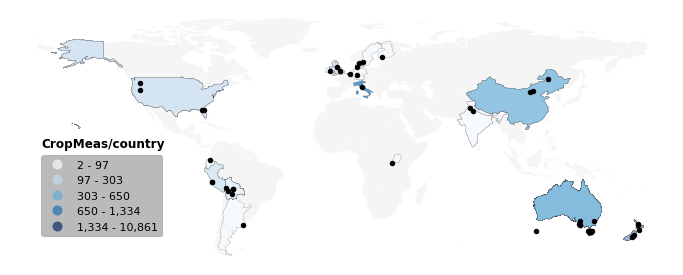

In [30]:
## first layer, all geometries included 
ax = for_plotting.plot(color="whitesmoke",figsize=(12, 8))

#plot merged file. use dropna to remove any country with no value
fig = for_plotting.dropna().plot(ax=ax, column='meas', cmap ='Blues', scheme='fisher_jenks',alpha=0.7,
                                k=5, legend=True, edgecolor='black',linewidth=0.2)

#Remove decimals in the legend
leg = fig.get_legend()
leg._loc = 3

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    label_text = label_text[1:-1].split(', ')
    lower = label_text[0]
    upper = label_text[1]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

leg.get_frame().set_color("darkgrey")

params = {'legend.fontsize': 11}
plot.rcParams.update(params)

#add title to the map
#ax.set_title('Model Uncertainty Decomposition', fontdict={'fontsize':20})
#remove axes
ax.set_axis_off()

#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.043,.1))

# #North America
# axin1 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(-0.04,0.8-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size1=[51,30,19]
# # Create a circle for the center of the plot
# my_circle1=plt.Circle( (0,0), 0.5, color='white')
# axin1.pie(size1, colors=['darkgreen','goldenrod','brown'])
# p1=plt.gcf()
# p1.gca().add_artist(my_circle1)
# a1=plt.text(-0.33, -0.0, "NA", size=12,weight='bold')
# a2=plt.text(-0.26, -0.35, "60", size=11)

# #South America
# axin2 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(0.08,0.52-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size2=[46,21,32]
# # Create a circle for the center of the plot
# my_circle2=plt.Circle( (0,0), 0.5, color='white')
# axin2.pie(size2, colors=['darkgreen','goldenrod','brown'])
# p2=plt.gcf()
# p2.gca().add_artist(my_circle2)
# a3=plt.text(-0.35, -0.0, "SA", size=12,weight='bold')
# a4=plt.text(-0.26, -0.36, "19", size=11)

# #Africa
# axin3 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(0.31,0.45-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size3=[57,11,32]
# # Create a circle for the center of the plot
# my_circle3=plt.Circle( (0,0), 0.5, color='white')
# axin3.pie(size3, colors=['darkgreen','goldenrod','brown'])
# p3=plt.gcf()
# p3.gca().add_artist(my_circle3)
# a5=plt.text(-0.30, -0.0, "AF", size=12,weight='bold')
# a6=plt.text(-0.27, -0.36, "66", size=11)

# #Europe
# axin4 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(0.26,0.83-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size4=[43,23,34]
# # Create a circle for the center of the plot
# my_circle4=plt.Circle( (0,0), 0.5, color='white')
# axin4.pie(size4, colors=['darkgreen','goldenrod','brown'])
# p4=plt.gcf()
# p4.gca().add_artist(my_circle4)
# a7=plt.text(-0.34, 0.03, "EU", size=12,weight='bold')
# a8=plt.text(-0.40, -0.33, "144", size=11)

# #Asia
# axin5 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(0.73,0.75-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size5=[47,36,16]
# # Create a circle for the center of the plot
# my_circle5=plt.Circle( (0,0), 0.5, color='white')
# axin5.pie(size5, colors=['darkgreen','goldenrod','brown'])
# p5=plt.gcf()
# p5.gca().add_artist(my_circle5)
# a9=plt.text(-0.36, -0.0, "AS", size=12,weight='bold')
# a10=plt.text(-0.29, -0.35, "97", size=11)

# #Oceania
# axin6 = inset_axes(ax,width="80%",height="80%", bbox_to_anchor=(0.57,0.4-0.3,.3,.3), bbox_transform=ax.transAxes)
# #names='I', 'P', 'S'
# size6=[42,26,32]
# # Create a circle for the center of the plot
# my_circle6=plt.Circle( (0,0), 0.5, color='white')
# axin6.pie(size6, colors=['darkgreen','goldenrod','brown'])
# p6=plt.gcf()
# p6.gca().add_artist(my_circle6)
# a11=plt.text(-0.39, -0.0, "OC", size=12,weight='bold')
# a12=plt.text(-0.28, -0.37, "14", size=11)

#Add additional legend for sources of decomposition
#colors = ['b', 'darkgreen','goldenrod','brown']
#parameters = [1,2,3,4]
#for p in parameters:
#    color = colors[parameters.index(p)]
#    plt.plot([1,10],[1,p], 'o', c=color)

# #lines = plt.gca().get_lines()
# legend2 = plt.legend(['Input','Parameter','Structure'], 
#                       bbox_to_anchor=(-5.78,0.35-0.3,.3,.3),prop={'size': 10},facecolor='darkgrey', framealpha=1, edgecolor=None)
# #plt.gca().add_artist(legend2)

a13=plt.text(-178, 8, "CropMeas/country", size=12,weight='bold')
#a14=plt.text(-18.7, -0.5, "SourceUncertainty/continent", size=10,weight='bold')

# build and plot coordinates onto map
var = data['var'].values
ax.scatter(data.lon, data.lat, marker='o', color='k', alpha=1, s=20)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\map.png', dpi=600, bbox_inches='tight')

No handles with labels found to put in legend.


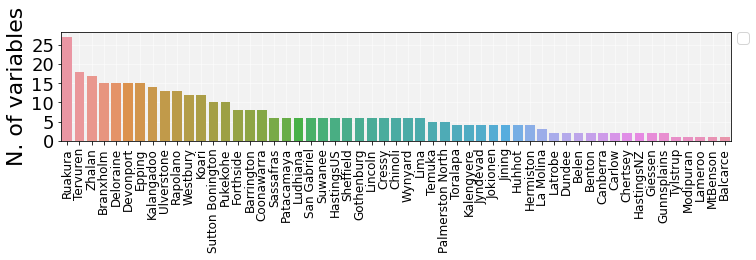

In [29]:
sums = data.groupby(['location'], as_index=False).sum().round(decimals=0)

# Apply order accordingly with mean yield
grouped = sums.groupby("location")
users_sorted_average = pd.DataFrame({col:vals['var'] for col,vals in grouped}).mean().sort_values(ascending=False)

fig = plt.figure(figsize=(12,2))

ax=plt.subplot(1, 1, 1)

sns.barplot(x="location", y="var", data=sums, linewidth=0.4,order=users_sorted_average.index, ci=None)
plt.setp(ax.collections, alpha=.4)

# Formatting graph and background
plt.legend(prop=dict(size=15),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('N. of variables', fontsize =22)
plt.xlabel('', fontsize =6)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.95')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=12, rotation=90)
ax.yaxis.set_tick_params(labelsize=18)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#ax.set_ylim([75,260])

plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\APSIMPotato\Paper docs\Paper 1\NewSubmission\data\barplot.png', dpi=300, bbox_inches='tight', pad_inches=0.0)

In [24]:
data.var.hist()

AttributeError: 'function' object has no attribute 'hist'